In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!pip install pytorchcv

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torchvision
import torchvision.models as models
from torchvision import models, transforms, datasets
import torch.optim as optim
import os, pickle, time, copy, glob
from PIL import Image
from torch.utils.data.sampler import SubsetRandomSampler
from torch.optim import lr_scheduler
from pytorchcv.model_provider import get_model as ptcv_get_model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve
import pandas as pd
import argparse
import json
from math import sqrt
import seaborn as sns
   

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
parser = argparse.ArgumentParser(description='COVID-19 Detection from X-ray Images')
parser.add_argument('-f')
parser.add_argument('--Restnet_model1_path', type=str, default='/content/gdrive/My Drive/Colab Notebooks/restnet18_model1_with_aug.pt',
                      help='The path and name of trained restnet model1')
parser.add_argument('--Restnet_model2_path', type=str, default='/content/gdrive/My Drive/Colab Notebooks/restnet18_model2_with_aug.pt',
                      help='The path and name of trained restnet model2')
parser.add_argument('--Restnet_model3_path', type=str, default='/content/gdrive/My Drive/Colab Notebooks/restnet18_model3_with_aug.pt',
                      help='The path and name of trained restnet model3')
parser.add_argument('--Restnet_model4_path', type=str, default='/content/gdrive/My Drive/Colab Notebooks/restnet18_model4_with_aug.pt',
                      help='The path and name of trained restnet model4')
parser.add_argument('--Restnet_model5_path', type=str, default='/content/gdrive/My Drive/Colab Notebooks/restnet18_model5_with_aug.pt',
                      help='The path and name of trained restnet model5')


parser.add_argument('--VGG16_model1_path', type=str, default='/content/gdrive/My Drive/Colab Notebooks/vgg16_model1_with_aug.pt',
                      help='The path and name of trained vgg16 model1')
parser.add_argument('--VGG16_model2_path', type=str, default='/content/gdrive/My Drive/Colab Notebooks/vgg16_model2_with_aug.pt',
                      help='The path and name of trained vgg16 model2')
parser.add_argument('--VGG16_model3_path', type=str, default='/content/gdrive/My Drive/Colab Notebooks/vgg16_model3_with_aug.pt',
                      help='The path and name of trained vgg16 model3')
parser.add_argument('--VGG16_model4_path', type=str, default='/content/gdrive/My Drive/Colab Notebooks/vgg16_model4_with_aug.pt',
                      help='The path and name of trained vgg16 model4')
parser.add_argument('--VGG16_model5_path', type=str, default='/content/gdrive/My Drive/Colab Notebooks/vgg16_model5_with_aug.pt',
                      help='The path and name of trained vgg16 model5')


parser.add_argument('--ZFnet_model1_path', type=str, default='/content/gdrive/My Drive/Colab Notebooks/zfnet_model1_with_aug.pt',
                      help='The path and name of trained ZFnet model1')
parser.add_argument('--ZFnet_model2_path', type=str, default='/content/gdrive/My Drive/Colab Notebooks/zfnet_model2_with_aug.pt',
                      help='The path and name of trained ZFnet model2')
parser.add_argument('--ZFnet_model3_path', type=str, default='/content/gdrive/My Drive/Colab Notebooks/zfnet_model3_with_aug.pt',
                      help='The path and name of trained ZFnet model3')
parser.add_argument('--ZFnet_model4_path', type=str, default='/content/gdrive/My Drive/Colab Notebooks/zfnet_model4_with_aug.pt',
                      help='The path and name of trained ZFnet model4')
parser.add_argument('--ZFnet_model5_path', type=str, default='/content/gdrive/My Drive/Colab Notebooks/zfnet_model5_with_aug.pt',
                      help='The path and name of trained ZFnet model5')


parser.add_argument('--Alexnet_model1_path', type=str, default='/content/gdrive/My Drive/Colab Notebooks/alexnet_model1_with_aug.pt',
                      help='The path and name of trained Alexnet model1')
parser.add_argument('--Alexnet_model2_path', type=str, default='/content/gdrive/My Drive/Colab Notebooks/alexnet_model2_with_aug.pt',
                      help='The path and name of trained Alexnet model2')
parser.add_argument('--Alexnet_model3_path', type=str, default='/content/gdrive/My Drive/Colab Notebooks/alexnet_model3_with_aug.pt',
                      help='The path and name of trained Alexnet model3')
parser.add_argument('--Alexnet_model4_path', type=str, default='/content/gdrive/My Drive/Colab Notebooks/alexnet_model4_with_aug.pt',
                      help='The path and name of trained Alexnet model4')
parser.add_argument('--Alexnet_model5_path', type=str, default='/content/gdrive/My Drive/Colab Notebooks/alexnet_model5_with_aug.pt',
                      help='The path and name of trained Alexnet model5')



parser.add_argument('--Googlenet_model1_path', type=str, default='/content/gdrive/My Drive/Colab Notebooks/googlenet_model1_with_aug.pt',
                      help='The path and name of trained Googlenet model1')
parser.add_argument('--Googlenet_model2_path', type=str, default='/content/gdrive/My Drive/Colab Notebooks/googlenet_model2_with_aug.pt',
                      help='The path and name of trained Googlenet model2')
parser.add_argument('--Googlenet_model3_path', type=str, default='/content/gdrive/My Drive/Colab Notebooks/googlenet_model3_with_aug.pt',
                      help='The path and name of trained Googlenet model3')
parser.add_argument('--Googlenet_model4_path', type=str, default='/content/gdrive/My Drive/Colab Notebooks/googlenet_model4_with_aug.pt',
                      help='The path and name of trained Googlenet model4')
parser.add_argument('--Googlenet_model5_path', type=str, default='/content/gdrive/My Drive/Colab Notebooks/googlenet_model5_with_aug.pt',
                      help='The path and name of trained Googlenet model5')

_StoreAction(option_strings=['--Googlenet_model5_path'], dest='Googlenet_model5_path', nargs=None, const=None, default='/content/gdrive/My Drive/Colab Notebooks/googlenet_model5_with_aug.pt', type=<class 'str'>, choices=None, help='The path and name of trained Googlenet model5', metavar=None)

In [ ]:
args = parser.parse_args()

In [ ]:

transformers = {'test_transforms' : transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])}

trans = ['test_transforms']
path = "/content/gdrive/My Drive/Colab Notebooks/MainDataAug/"
categories = ['test']

In [ ]:
dset = {x : torchvision.datasets.ImageFolder(path+x, transform=transformers[y]) for x,y in zip(categories, trans)}

In [ ]:
len_test = len(dset['test'])
test_idx = [i for i in range(len(dset['test']))]
print('the test imagedataest size', len(dset['test']))
test_sampler = SubsetRandomSampler(test_idx)

the test imagedataest size 3040


In [ ]:
test_loader = torch.utils.data.DataLoader(dset['test'], batch_size=16, 
    drop_last= True,sampler=test_sampler,num_workers=0)
dataloaders = {'test':test_loader}

class_names = dset['test'].classes

In [ ]:
images, labels = next(iter(dataloaders['test']))
rand_idx = np.random.randint(len(images))
print("label: {}, class: {}".format(labels[rand_idx].item(),
                                               class_names[labels[rand_idx].item()]))

label: 0, class: covid-n


In [ ]:
#Loading Restnet models
Restnet_model1_name= args.Restnet_model1_path
Restnet_model1= torch.load(Restnet_model1_name, map_location='cpu')
Restnet_model2_name= args.Restnet_model2_path 
Restnet_model2= torch.load(Restnet_model2_name, map_location='cpu')
Restnet_model3_name= args.Restnet_model3_path
Restnet_model3= torch.load(Restnet_model3_name, map_location='cpu')
Restnet_model4_name= args.Restnet_model4_path
Restnet_model4= torch.load(Restnet_model4_name, map_location='cpu')
Restnet_model5_name= args.Restnet_model5_path
Restnet_model5= torch.load(Restnet_model5_name, map_location='cpu')

#Loading VGG16 models
VGG16_model1_name= args.VGG16_model1_path
VGG16_model1= torch.load(VGG16_model1_name, map_location='cpu')
VGG16_model2_name= args.VGG16_model2_path
VGG16_model2= torch.load(VGG16_model2_name, map_location='cpu')
VGG16_model3_name= args.VGG16_model3_path
VGG16_model3= torch.load(VGG16_model3_name, map_location='cpu')
VGG16_model4_name= args.VGG16_model4_path
VGG16_model4= torch.load(VGG16_model4_name, map_location='cpu')
VGG16_model5_name= args.VGG16_model5_path
VGG16_model5= torch.load(VGG16_model5_name, map_location='cpu')

#Loading ZFnet models
ZFnet_model1_name= args.ZFnet_model1_path
ZFnet_model1= torch.load(ZFnet_model1_name, map_location='cpu')
ZFnet_model2_name= args.ZFnet_model2_path
ZFnet_model2= torch.load(ZFnet_model2_name, map_location='cpu')
ZFnet_model3_name= args.ZFnet_model3_path
ZFnet_model3= torch.load(ZFnet_model3_name, map_location='cpu')
ZFnet_model4_name= args.ZFnet_model4_path
ZFnet_model4= torch.load(ZFnet_model4_name, map_location='cpu')
ZFnet_model5_name= args.ZFnet_model5_path
ZFnet_model5= torch.load(ZFnet_model5_name, map_location='cpu')

#Loading Alexnet models
Alexnet_model1_name= args.Alexnet_model1_path
Alexnet_model1= torch.load(Alexnet_model1_name, map_location='cpu')
Alexnet_model2_name= args.Alexnet_model2_path
Alexnet_model2= torch.load(Alexnet_model2_name, map_location='cpu')
Alexnet_model3_name= args.Alexnet_model3_path
Alexnet_model3= torch.load(Alexnet_model3_name, map_location='cpu')
Alexnet_model4_name= args.Alexnet_model4_path
Alexnet_model4= torch.load(Alexnet_model4_name, map_location='cpu')
Alexnet_model5_name= args.Alexnet_model5_path
Alexnet_model5= torch.load(Alexnet_model5_name, map_location='cpu')

#Loading Googlenet models
Googlenet_model1_name= args.Googlenet_model1_path
Googlenet_model1= torch.load(Googlenet_model1_name, map_location='cpu')
Googlenet_model2_name= args.Googlenet_model2_path
Googlenet_model2= torch.load(Googlenet_model2_name, map_location='cpu')
Googlenet_model3_name= args.Googlenet_model3_path
Googlenet_model3= torch.load(Googlenet_model3_name, map_location='cpu')
Googlenet_model4_name= args.Googlenet_model4_path
Googlenet_model4= torch.load(Googlenet_model4_name, map_location='cpu')
Googlenet_model5_name= args.Googlenet_model5_path
Googlenet_model5= torch.load(Googlenet_model5_name, map_location='cpu')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set

In [ ]:
from math import sqrt
accuracy = []
sensitivity = []
specificity = []
mcc = []
aucscore = []
lrauc = []
def predict(model):
  nb_classes = 2
  confusion_matrix = torch.zeros(nb_classes, nb_classes)
  tp = 0 
  tn = 0
  fp = 0
  fn = 0
  with torch.no_grad():
    y_pred_list = []
    y_true_list = []

    for inputs, labels in dataloaders['test']:
      y_test_pred = model(inputs)
      
      #y_test_pred = torch.sigmoid(model(inputs))
      #y_test_pred[y_test_pred >= 0.30] = 1
      #y_test_pred[y_test_pred < 0.30] = 0
      _, y_pred_tag = torch.max(y_test_pred, 1)
      
      #Printing labels
      #label_names = [[class_names[e]] for e in labels]
      #print(label_names)
      #Printing predicted class name
      #pred_names = [[class_names[e]] for e in y_pred_tag]
      #print(pred_names)
      y_pred_list.append(y_pred_tag.cpu().numpy())
      y_true_list.append(labels.cpu().numpy())


      for t, p in zip(labels.view(-1), y_pred_tag.view(-1)):
        confusion_matrix[t, p] += 1
        TP = confusion_matrix[1][1]
        TN = confusion_matrix[0][0]
        FP = confusion_matrix[0][1]
        FN = confusion_matrix[1][0]
  
  
  print(confusion_matrix)
  ax= plt.subplot()
  sns.heatmap(confusion_matrix, annot=True, ax = ax); #annot=True to annotate cells
  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix'); 
  ax.xaxis.set_ticklabels(['non', 'covid']); ax.yaxis.set_ticklabels(['non', 'covid']); 
  print('TP: %.2f' % TP)
  print('FP: %.2f' % FP)
  print('FN: %.2f' % FN)
  print('TN: %.2f' % TN)
#Calculating sensitivity, specificity,  Accurracy, MCC, AUC
  sens = (TP / (TP + FN))*100
  print('Sensitivity: %.2f' % sens) 
  spec = (TN / (TN + FP))*100
  print('Specificity: %.2f' % spec)
  acc = ((TP + TN) / (TP + FP + FN + TN))*100
  print('Accuracy: %.2f' % acc)
  mcc_x = (TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)
  mccscore = ((TP * TN) - (FP * FN)) / sqrt(mcc_x)
  print('MCC: %.2f' % mccscore)
  #fpr = (fp) / (fp+tn)

#Appending calculated values to list
  sensitivity.append(sens) 
  specificity.append(spec)
  accuracy.append(acc)
  mcc.append(mccscore)

 

tensor([[2989.,   11.],
        [  12.,   28.]])
TP: 28.00
FP: 11.00
FN: 12.00
TN: 2989.00
Sensitivity: 70.00
Specificity: 99.63
Accuracy: 99.24
MCC: 0.71


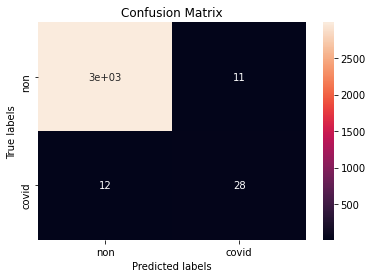

In [ ]:
#Predicting Restnet models
predict(Restnet_model1)

tensor([[2980.,   20.],
        [  13.,   27.]])
TP: 27.00
FP: 20.00
FN: 13.00
TN: 2980.00
Sensitivity: 67.50
Specificity: 99.33
Accuracy: 98.91
MCC: 0.62


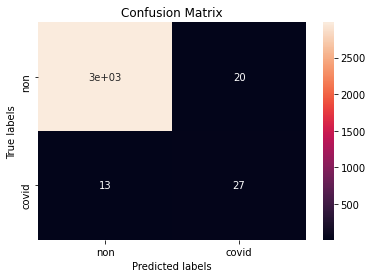

In [ ]:
predict(Restnet_model2)


tensor([[2984.,   16.],
        [  13.,   27.]])
TP: 27.00
FP: 16.00
FN: 13.00
TN: 2984.00
Sensitivity: 67.50
Specificity: 99.47
Accuracy: 99.05
MCC: 0.65


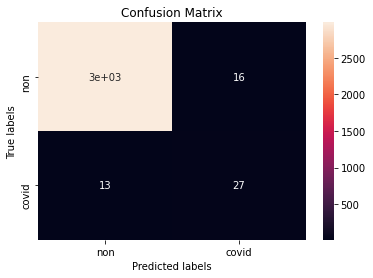

In [ ]:
predict(Restnet_model3)


tensor([[2991.,    9.],
        [  15.,   25.]])
TP: 25.00
FP: 9.00
FN: 15.00
TN: 2991.00
Sensitivity: 62.50
Specificity: 99.70
Accuracy: 99.21
MCC: 0.67


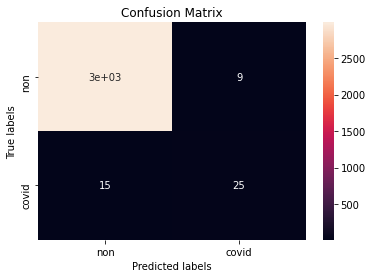

In [ ]:
predict(Restnet_model4)


tensor([[2993.,    7.],
        [  14.,   26.]])
TP: 26.00
FP: 7.00
FN: 14.00
TN: 2993.00
Sensitivity: 65.00
Specificity: 99.77
Accuracy: 99.31
MCC: 0.71


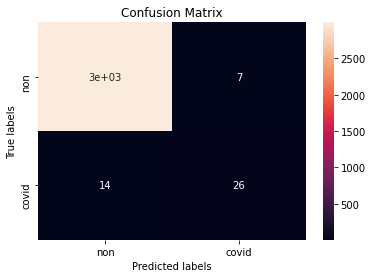

In [ ]:
predict(Restnet_model5)

In [ ]:
#Storing sens, spec, acc, mcc, auc to another list
Restnet_sens = sensitivity.copy()
Restnet_spec = specificity.copy()
Restnet_acc = accuracy.copy()
Restnet_mcc = mcc.copy()


#Clearning lists for next models
sensitivity.clear()
specificity.clear()
accuracy.clear()
mcc.clear()


tensor([[2966.,   34.],
        [   8.,   32.]])
TP: 32.00
FP: 34.00
FN: 8.00
TN: 2966.00
Sensitivity: 80.00
Specificity: 98.87
Accuracy: 98.62
MCC: 0.62


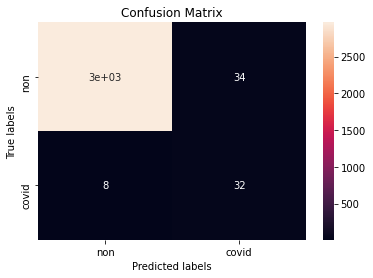

In [ ]:
#Predicting VGG16 models
predict(VGG16_model1)


tensor([[2972.,   28.],
        [   5.,   35.]])
TP: 35.00
FP: 28.00
FN: 5.00
TN: 2972.00
Sensitivity: 87.50
Specificity: 99.07
Accuracy: 98.91
MCC: 0.69


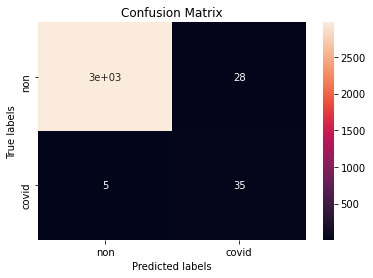

In [ ]:
predict(VGG16_model2)


tensor([[2952.,   48.],
        [   3.,   37.]])
TP: 37.00
FP: 48.00
FN: 3.00
TN: 2952.00
Sensitivity: 92.50
Specificity: 98.40
Accuracy: 98.32
MCC: 0.63


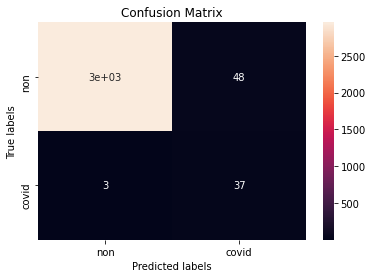

In [ ]:
predict(VGG16_model3)


tensor([[2959.,   41.],
        [   7.,   33.]])
TP: 33.00
FP: 41.00
FN: 7.00
TN: 2959.00
Sensitivity: 82.50
Specificity: 98.63
Accuracy: 98.42
MCC: 0.60


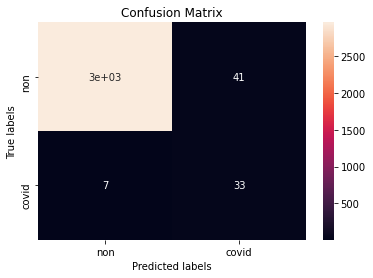

In [ ]:
predict(VGG16_model4)


tensor([[2954.,   46.],
        [   6.,   34.]])
TP: 34.00
FP: 46.00
FN: 6.00
TN: 2954.00
Sensitivity: 85.00
Specificity: 98.47
Accuracy: 98.29
MCC: 0.59


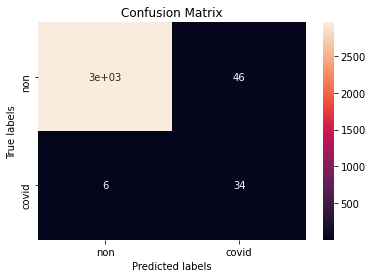

In [ ]:
predict(VGG16_model5)

In [ ]:
#Storing sens, spec, acc, mcc, auc to another list
VGG16_sens = sensitivity.copy()
VGG16_spec = specificity.copy()
VGG16_acc = accuracy.copy()
VGG16_mcc = mcc.copy()


#Clearning lists for next models
sensitivity.clear()
specificity.clear()
accuracy.clear()
mcc.clear()


tensor([[2976.,   24.],
        [   7.,   33.]])
TP: 33.00
FP: 24.00
FN: 7.00
TN: 2976.00
Sensitivity: 82.50
Specificity: 99.20
Accuracy: 98.98
MCC: 0.69


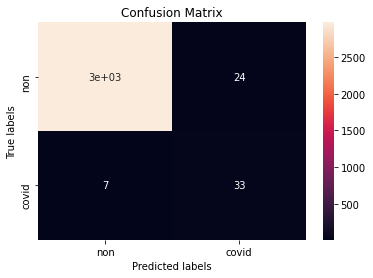

In [ ]:
#Predicting ZFnet models
predict(ZFnet_model1)



tensor([[2976.,   24.],
        [   9.,   31.]])
TP: 31.00
FP: 24.00
FN: 9.00
TN: 2976.00
Sensitivity: 77.50
Specificity: 99.20
Accuracy: 98.91
MCC: 0.66


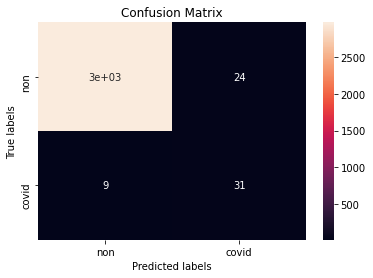

In [ ]:
predict(ZFnet_model2)


tensor([[2984.,   16.],
        [  10.,   30.]])
TP: 30.00
FP: 16.00
FN: 10.00
TN: 2984.00
Sensitivity: 75.00
Specificity: 99.47
Accuracy: 99.14
MCC: 0.70


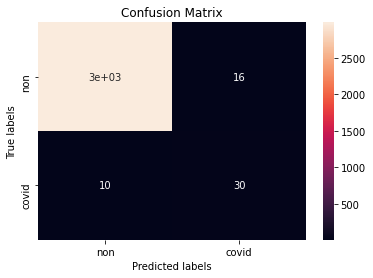

In [ ]:
predict(ZFnet_model3)


tensor([[2986.,   14.],
        [  10.,   30.]])
TP: 30.00
FP: 14.00
FN: 10.00
TN: 2986.00
Sensitivity: 75.00
Specificity: 99.53
Accuracy: 99.21
MCC: 0.71


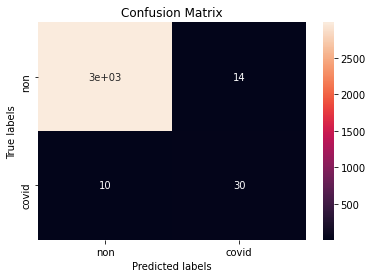

In [ ]:
predict(ZFnet_model4)


tensor([[2979.,   21.],
        [   8.,   32.]])
TP: 32.00
FP: 21.00
FN: 8.00
TN: 2979.00
Sensitivity: 80.00
Specificity: 99.30
Accuracy: 99.05
MCC: 0.69


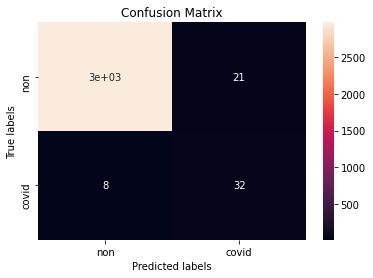

In [ ]:
predict(ZFnet_model5)

In [ ]:
#Storing sens, spec, acc, mcc, auc to another list
ZFnet_sens = sensitivity.copy()
ZFnet_spec = specificity.copy()
ZFnet_acc = accuracy.copy()
ZFnet_mcc = mcc.copy()


#Clearning lists for next models
sensitivity.clear()
specificity.clear()
accuracy.clear()
mcc.clear()


tensor([[2941.,   59.],
        [   4.,   36.]])
TP: 36.00
FP: 59.00
FN: 4.00
TN: 2941.00
Sensitivity: 90.00
Specificity: 98.03
Accuracy: 97.93
MCC: 0.58


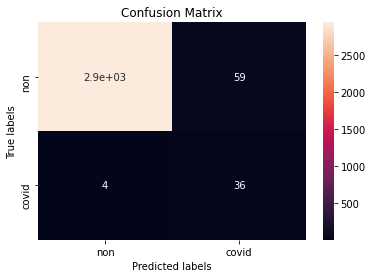

In [ ]:
#Predicting Alexnet models
predict(Alexnet_model1)


tensor([[2979.,   21.],
        [   7.,   33.]])
TP: 33.00
FP: 21.00
FN: 7.00
TN: 2979.00
Sensitivity: 82.50
Specificity: 99.30
Accuracy: 99.08
MCC: 0.71


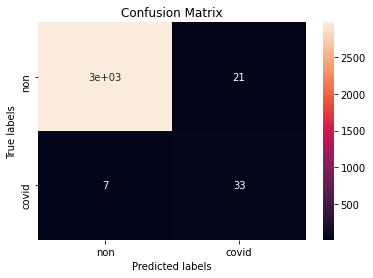

In [ ]:
predict(Alexnet_model2)


tensor([[2962.,   38.],
        [   5.,   35.]])
TP: 35.00
FP: 38.00
FN: 5.00
TN: 2962.00
Sensitivity: 87.50
Specificity: 98.73
Accuracy: 98.59
MCC: 0.64


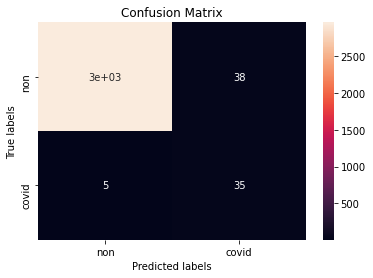

In [ ]:
predict(Alexnet_model3)



tensor([[2943.,   57.],
        [   6.,   34.]])
TP: 34.00
FP: 57.00
FN: 6.00
TN: 2943.00
Sensitivity: 85.00
Specificity: 98.10
Accuracy: 97.93
MCC: 0.56


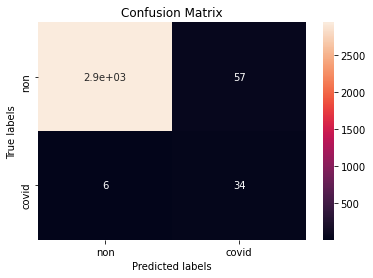

In [ ]:
predict(Alexnet_model4)


tensor([[2951.,   49.],
        [   5.,   35.]])
TP: 35.00
FP: 49.00
FN: 5.00
TN: 2951.00
Sensitivity: 87.50
Specificity: 98.37
Accuracy: 98.22
MCC: 0.60


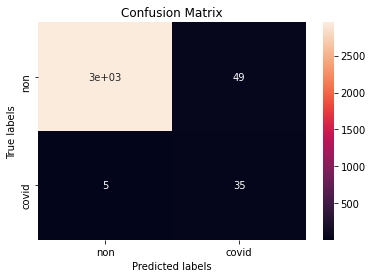

In [ ]:
predict(Alexnet_model5)

In [ ]:
#Storing sens, spec, acc, mcc, auc to another list
Alexnet_sens = sensitivity.copy()
Alexnet_spec = specificity.copy()
Alexnet_acc = accuracy.copy()
Alexnet_mcc = mcc.copy()


#Clearning lists for next models
sensitivity.clear()
specificity.clear()
accuracy.clear()
mcc.clear()


tensor([[2989.,   11.],
        [  14.,   26.]])
TP: 26.00
FP: 11.00
FN: 14.00
TN: 2989.00
Sensitivity: 65.00
Specificity: 99.63
Accuracy: 99.18
MCC: 0.67


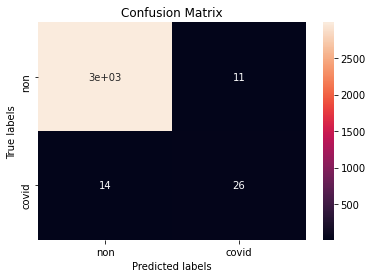

In [ ]:
#Predicting Googlenet models
predict(Googlenet_model1)


tensor([[2985.,   15.],
        [   9.,   31.]])
TP: 31.00
FP: 15.00
FN: 9.00
TN: 2985.00
Sensitivity: 77.50
Specificity: 99.50
Accuracy: 99.21
MCC: 0.72


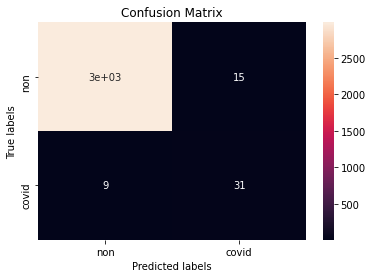

In [ ]:
predict(Googlenet_model2)


tensor([[2995.,    5.],
        [  15.,   25.]])
TP: 25.00
FP: 5.00
FN: 15.00
TN: 2995.00
Sensitivity: 62.50
Specificity: 99.83
Accuracy: 99.34
MCC: 0.72


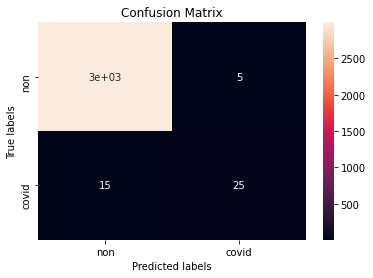

In [ ]:
predict(Googlenet_model3)


tensor([[2996.,    4.],
        [  20.,   20.]])
TP: 20.00
FP: 4.00
FN: 20.00
TN: 2996.00
Sensitivity: 50.00
Specificity: 99.87
Accuracy: 99.21
MCC: 0.64


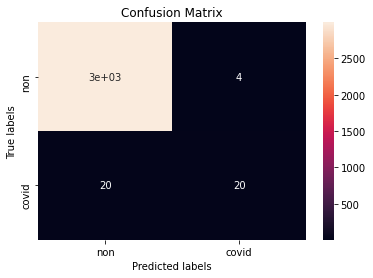

In [ ]:
predict(Googlenet_model4)


tensor([[2994.,    6.],
        [  18.,   22.]])
TP: 22.00
FP: 6.00
FN: 18.00
TN: 2994.00
Sensitivity: 55.00
Specificity: 99.80
Accuracy: 99.21
MCC: 0.65


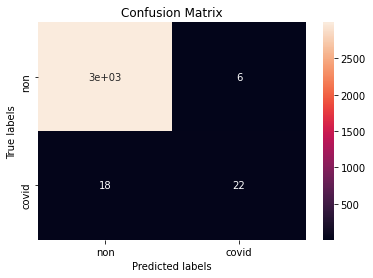

In [ ]:
predict(Googlenet_model5)

In [ ]:
#Storing sens, spec, acc, mcc, auc to another list
Googlenet_sens = sensitivity.copy()
Googlenet_spec = specificity.copy()
Googlenet_acc = accuracy.copy()
Googlenet_mcc = mcc.copy()


#Clearning lists for next models
sensitivity.clear()
specificity.clear()
accuracy.clear()
mcc.clear()


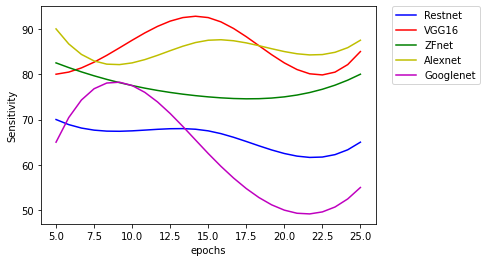

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline

def create_spline_from(x, y, resolution):
  new_x = np.linspace(x[0], x[-1], resolution)
  y_spline = make_interp_spline(x, y, k=3)
  new_y= y_spline(new_x)

  return (new_x, new_y)

epochs=[5,10,15,20,25]



x, y = create_spline_from(epochs, Restnet_sens, 25)
plt.plot(x, y, 'b', label='Restnet')

x, y = create_spline_from(epochs, VGG16_sens, 25)
plt.plot(x, y, 'r', label='VGG16')

x, y = create_spline_from(epochs, ZFnet_sens, 25)
plt.plot(x, y, 'g', label='ZFnet')

x, y = create_spline_from(epochs, Alexnet_sens, 25)
plt.plot(x, y, 'y', label='Alexnet')

x, y = create_spline_from(epochs, Googlenet_sens, 25)
plt.plot(x, y, 'm', label='Googlenet')

plt.ylabel('Sensitivity')
plt.xlabel('epochs')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



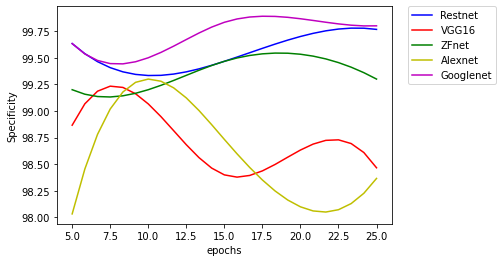

In [ ]:
def create_spline_from(x, y, resolution):
  new_x = np.linspace(x[0], x[-1], resolution)
  y_spline = make_interp_spline(x, y, k=3)
  new_y= y_spline(new_x)

  return (new_x, new_y)

epochs=[5,10,15,20,25]



x, y = create_spline_from(epochs, Restnet_spec, 25)
plt.plot(x, y, 'b', label='Restnet')

x, y = create_spline_from(epochs, VGG16_spec, 25)
plt.plot(x, y, 'r', label='VGG16')

x, y = create_spline_from(epochs, ZFnet_spec, 25)
plt.plot(x, y, 'g', label='ZFnet')

x, y = create_spline_from(epochs, Alexnet_spec, 25)
plt.plot(x, y, 'y', label='Alexnet')

x, y = create_spline_from(epochs, Googlenet_spec, 25)
plt.plot(x, y, 'm', label='Googlenet')

plt.ylabel('Specificity')
plt.xlabel('epochs')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



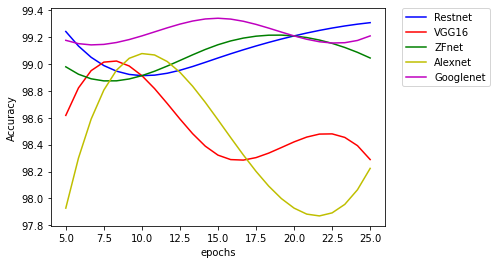

In [ ]:
def create_spline_from(x, y, resolution):
  new_x = np.linspace(x[0], x[-1], resolution)
  y_spline = make_interp_spline(x, y, k=3)
  new_y= y_spline(new_x)

  return (new_x, new_y)

epochs=[5,10,15,20,25]



x, y = create_spline_from(epochs, Restnet_acc, 25)
plt.plot(x, y, 'b', label='Restnet')

x, y = create_spline_from(epochs, VGG16_acc, 25)
plt.plot(x, y, 'r', label='VGG16')

x, y = create_spline_from(epochs, ZFnet_acc, 25)
plt.plot(x, y, 'g', label='ZFnet')

x, y = create_spline_from(epochs, Alexnet_acc, 25)
plt.plot(x, y, 'y', label='Alexnet')

x, y = create_spline_from(epochs, Googlenet_acc, 25)
plt.plot(x, y, 'm', label='Googlenet')

plt.ylabel('Accuracy')
plt.xlabel('epochs')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



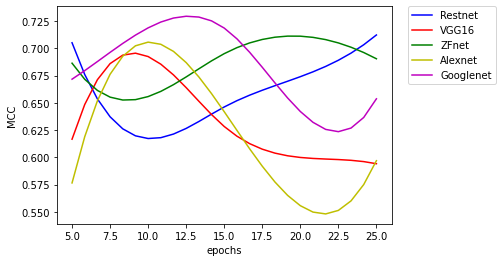

In [ ]:
def create_spline_from(x, y, resolution):
  new_x = np.linspace(x[0], x[-1], resolution)
  y_spline = make_interp_spline(x, y, k=3)
  new_y= y_spline(new_x)

  return (new_x, new_y)

epochs=[5,10,15,20,25]



x, y = create_spline_from(epochs, Restnet_mcc, 25)
plt.plot(x, y, 'b', label='Restnet')

x, y = create_spline_from(epochs, VGG16_mcc, 25)
plt.plot(x, y, 'r', label='VGG16')

x, y = create_spline_from(epochs, ZFnet_mcc, 25)
plt.plot(x, y, 'g', label='ZFnet')

x, y = create_spline_from(epochs, Alexnet_mcc, 25)
plt.plot(x, y, 'y', label='Alexnet')

x, y = create_spline_from(epochs, Googlenet_mcc, 25)
plt.plot(x, y, 'm', label='Googlenet')

plt.ylabel('MCC')
plt.xlabel('epochs')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
